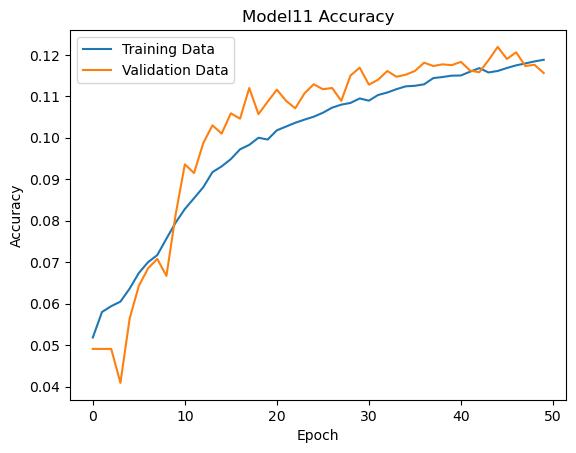

In [1]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pickle
history = pickle.load(open("Models/Model11/history.p", "rb"))

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model11 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='upper left') 
plt.savefig('png/Model11 Accuracy.png')

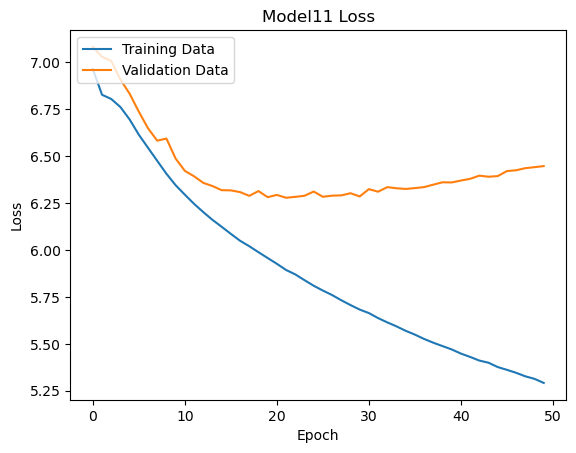

In [2]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model11 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='upper left') 
plt.savefig('png/Model11 Loss.png')

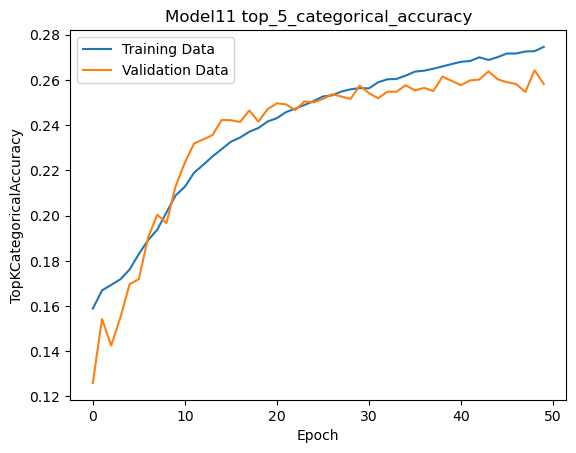

In [3]:
plt.plot(history['top_5_categorical_accuracy'])
plt.plot(history['val_top_5_categorical_accuracy'])
plt.title('Model11 top_5_categorical_accuracy')
plt.ylabel('TopKCategoricalAccuracy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='upper left') 
plt.savefig('png/Model11 top_5_categorical_accuracy k=5.png')

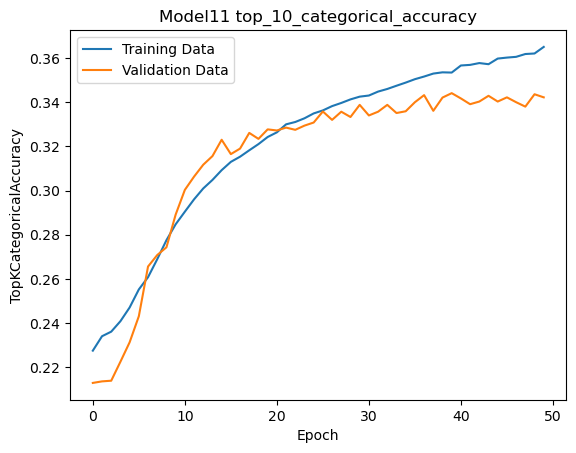

In [4]:
plt.plot(history['top_10_categorical_accuracy'])
plt.plot(history['val_top_10_categorical_accuracy'])
plt.title('Model11 top_10_categorical_accuracy')
plt.ylabel('TopKCategoricalAccuracy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='upper left') 
plt.savefig('png/Model11 top_10_categorical_accuracy k=5.png')

In [5]:
from tensorflow import keras
from tensorflow.keras.metrics import TopKCategoricalAccuracy
from sklearn.metrics import f1_score
import numpy as np

# Metrics
def top_5_categorical_accuracy(y_true, y_pred):
    return keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k=5)
def top_10_categorical_accuracy(y_true, y_pred):
    return keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k=10)
# Activation Functions
def elliott_activation(x):
    return (0.5 * x / (1 + tf.abs(x))) + 0.5
def modified_elliott_activation(x):
    return (x / tf.sqrt(1 + tf.square(x))) + 0.5
# Registriere die benutzerdefinierten Metrikfunktionen
custom_objects = {'top_5_categorical_accuracy': top_5_categorical_accuracy,
                  'top_10_categorical_accuracy': top_10_categorical_accuracy,
                 'elliott_activation': elliott_activation,
                 'modified_elliott_activation': modified_elliott_activation}
mname="Model11"
# Lade das Modell mit den registrierten benutzerdefinierten Metriken
with tf.keras.utils.custom_object_scope(custom_objects):
    model = keras.models.load_model("Models/"+mname+'/Model_200000.h5')

# model = keras.models.load_model('Model6/Model_100000.h5')

# Vorbereiten der Validierungsdaten
with open('FormatedData/200000/x_val.pickle', 'rb') as file:
    x_val = pickle.load(file)
with open('FormatedData/200000/y_val.pickle', 'rb') as file:
    y_val = pickle.load(file)

# Vorhersagen des Modells für die Validierungsdaten
predictions = model.predict(x_val)
print(mname,":")
# Genauigkeit (Accuracy)
accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(y_val, axis=1))
print("Accuracy:", accuracy)

# Perplexität (Perplexity)
perplexity = np.exp(np.mean(-np.log(predictions[np.arange(len(y_val)), np.argmax(y_val, axis=1)])))
print("Perplexity:", perplexity)

# Top-k Genauigkeit (Top-k Accuracy)
k = 5  # Anzahl der wahrscheinlichsten Vorhersagen
top_k_accuracy = TopKCategoricalAccuracy(k=k)
top_k_accuracy.update_state(y_val, predictions)
print("Top-", k, "Accuracy:", top_k_accuracy.result().numpy())

# Top-k Genauigkeit (Top-k Accuracy)
k = 10  # Anzahl der wahrscheinlichsten Vorhersagen
top_k_accuracy = TopKCategoricalAccuracy(k=k)
top_k_accuracy.update_state(y_val, predictions)
print("Top-", k, "Accuracy:", top_k_accuracy.result().numpy())

313/313 [==============================] - 31s 99ms/step
Model11 :
Accuracy: 0.1156
Perplexity: 630.051
Top- 5 Accuracy: 0.2582
Top- 10 Accuracy: 0.3422


In [6]:
history2 = pickle.load(open("Models/Model2/history.p", "rb"))
history3 = pickle.load(open("Models/Model3/history.p", "rb"))
print("Model2:")
print("Last top_5_categorical_accuracy:",history2['top_k_categorical_accuracy'][49])
print("Last val top_5_categorical_accuracy:", history2['val_top_k_categorical_accuracy'][49])
print("Model3:")
print("Last top_5_categorical_accuracy:",history3['top_k_categorical_accuracy'][49])
print("Last val top_5_categorical_accuracy:", history3['val_top_k_categorical_accuracy'][49])

Model2:
Last top_5_categorical_accuracy: 0.401042103767395
Last val top_5_categorical_accuracy: 0.24580000340938568
Model3:
Last top_5_categorical_accuracy: 0.2766842246055603
Last val top_5_categorical_accuracy: 0.257999986410141


In [8]:
models_to_show = [9,11]

for model_num in models_to_show:
    model = "Models/Model" + str(model_num)
    history = pickle.load(open(model + "/history.p", "rb"))

    print(model + ":")
    print("Last accuracy:", history['accuracy'][-1])
    print("Last val accuracy:", history['val_accuracy'][-1])
    print("Last Loss:", history['loss'][-1])
    print("Last val Loss:", history['val_loss'][-1])
    print("Last top_5_categorical_accuracy:", history['top_5_categorical_accuracy'][-1])
    print("Last val top_5_categorical_accuracy:", history['val_top_5_categorical_accuracy'][-1])
    print("Last top_10_categorical_accuracy:", history['top_10_categorical_accuracy'][-1])
    print("Last val top_10_categorical_accuracy:", history['val_top_10_categorical_accuracy'][-1])

Models/Model9:
Last accuracy: 0.12973158061504364
Last val accuracy: 0.12489999830722809
Last Loss: 5.22743558883667
Last val Loss: 6.403142929077148
Last top_5_categorical_accuracy: 0.2895315885543823
Last val top_5_categorical_accuracy: 0.26460000872612
Last top_10_categorical_accuracy: 0.3795631527900696
Last val top_10_categorical_accuracy: 0.3456000089645386
Models/Model11:
Last accuracy: 0.11879999935626984
Last val accuracy: 0.11559999734163284
Last Loss: 5.291818618774414
Last val Loss: 6.445801734924316
Last top_5_categorical_accuracy: 0.27462103962898254
Last val top_5_categorical_accuracy: 0.2581999897956848
Last top_10_categorical_accuracy: 0.36503157019615173
Last val top_10_categorical_accuracy: 0.34220001101493835
